In [0]:
%matplotlib inline
import seaborn as sns
# Importamos algumas funcionalidades de plot
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_context('notebook')

# O comando acima melhora o visual dos plots quando usados no jupyter-notebook
# Ele deve ser colocado no início da célula, mas não se preocupe com isso.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing

import pandas as pd
import numpy as np


from scipy.spatial.distance import euclidean
import random

import warnings
warnings.filterwarnings('ignore')

# Usando o Kmeans 

Para aplicar o kmeans\, vamos utilizar mais famosa e utilizada oficialmente nos exemplos do SciKitLearn é a Iris. A base foi gerada a partir de observações de espécies de flores, e o que queremos aqui é que o computador consiga agrupar indivíduos baseados em uma medida de similaridade. Todos os métodos de clustering terão esse perfil, afinal esse é o significado de clustering: agrupamento.

<table style="border: 1px solid black;">
<tr style="border: 1px solid black;">
<td style="border: 1px solid black;">
<span>
    <font size=5><center>Tradução dos atributos</center></font>
    
| &#8203; | &#8203; |
|---|---|
|<font size=4>sepal length</font> | <font size=4> comprimento da sépala</font>|
|<font size=4>sepal width</font>  | <font size=4> largura da sépala</font>|
|<font size=4>petal length</font> | <font size=4> comprimento da pétala</font>|
|<font size=4>petal width</font>  | <font size=4> largura da pétala     </font>|

</span>
</td>
</tr>
</table>
KMeans ( [Teoria](http://www.dataminingbook.info/pmwiki.php/Main/BookPathUploads?action=download&upname=slides-chap13.pdf), [Documentação](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) )

In [0]:
# O scikitlearn possui um módulo que contém diversos conjuntos de dados.
# Vamos usar esse módulo (chamado datasets, importado acima) para carregar
# a base iris. Diferentemente da aula anterior, não estamos carregando a
# base a partir de um arquivo local, então é uma boa prática verificar
# o tipo dos dados retornados pela função abaixo.
iris_dataset = datasets.load_iris()

# Digitando 'iris_dataset.' e apertando TAB é possível ver atributos e funções
# atreladas ao tipo dessa variável. No exemplo da aula anterior, a classe real já
# estava junto das características. Como a base foi carregada pelo módulo datasets,
# esse tipo provém a classe e os atributos dos indivíduos separadamente.

# Os métodos do scikitlearn não utilizam o pandas, porém para uma visualização da
# base em um formato familiar, carregue a base em DataFrames e verifique cada uma.

iris_atribs_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

iris_atribs_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
#Carregamos a classe de cada tupla
iris_classe_df = pd.DataFrame(iris_dataset.target, columns=['species'])
iris_classe_df.head()

,species
0,0
1,0
2,0
3,0
4,0


In [0]:
# Vamos visualizar quais são os labels presentes e contar quantos de cada nós temos no dataset
# nossa base contém então três especies de flores [0, 1, 3], e tem 50 flores de cada tipo
iris_classe_df.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [0]:
#Antes de rodar o kmeans, devemos normalizar os dados. Vamos usar a normalização Z-score
standard_scaler = preprocessing.StandardScaler()
df_standard = standard_scaler.fit_transform(iris_atribs_df.values)
df_standard = pd.DataFrame(df_standard,columns=iris_atribs_df.columns)
df_standard.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


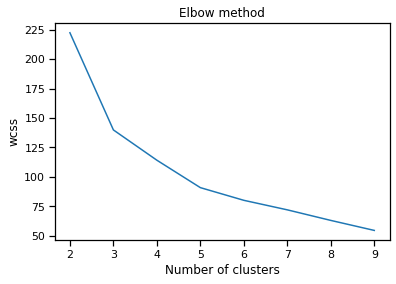

In [0]:
scores = []
for i in range(2,10):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_standard)
    scores.append(kmeans.inertia_)

plt.plot(range(2,10),scores)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


# Medidas internas de qualidade


## Silhouette

O Coeficiente de silhouette do KMeans com 2 clusters é: 0.5817500491982808
O Coeficiente de silhouette do KMeans com 3 clusters é: 0.45994823920518635
O Coeficiente de silhouette do KMeans com 4 clusters é: 0.38659448597428203
O Coeficiente de silhouette do KMeans com 5 clusters é: 0.34551099599809465
O Coeficiente de silhouette do KMeans com 6 clusters é: 0.326744511091124
O Coeficiente de silhouette do KMeans com 7 clusters é: 0.33234798580106617
O Coeficiente de silhouette do KMeans com 8 clusters é: 0.34258090311510425
O Coeficiente de silhouette do KMeans com 9 clusters é: 0.35303022646799614


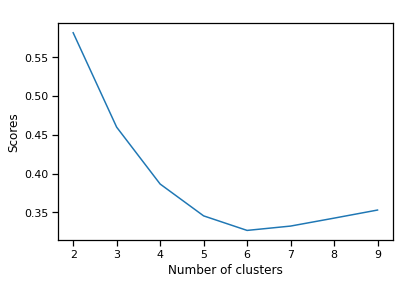

In [0]:
scores = []
kmeans_tentativas = {}
for i in range(2, 10):
    kmeans_tentativas['kmeans_' + str(i)] = kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_tentativas['kmeans_' + str(i)].fit(df_standard)
    scores.append(silhouette_score(df_standard.values, kmeans_tentativas['kmeans_' + str(i)].labels_, metric='euclidean'))
    print( 'O Coeficiente de silhouette do KMeans com {} clusters é: {}'.format(i,
        silhouette_score(df_standard.values, kmeans_tentativas['kmeans_' + str(i)].labels_, metric='euclidean') ) )
    
plt.plot(range(2,10),scores)
plt.title(' ')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.show()


## BetaCV

O Coeficiente de BetaCv do KMeans com 2 clusters é: 0.43129670961513217
O Coeficiente de BetaCv do KMeans com 3 clusters é: 0.3904056669569535
O Coeficiente de BetaCv do KMeans com 4 clusters é: 0.3863811725232072
O Coeficiente de BetaCv do KMeans com 5 clusters é: 0.3471069359173102
O Coeficiente de BetaCv do KMeans com 6 clusters é: 0.3264555726549868
O Coeficiente de BetaCv do KMeans com 7 clusters é: 0.3166169530458114
O Coeficiente de BetaCv do KMeans com 8 clusters é: 0.30447678041249976
O Coeficiente de BetaCv do KMeans com 9 clusters é: 0.2905094366588751


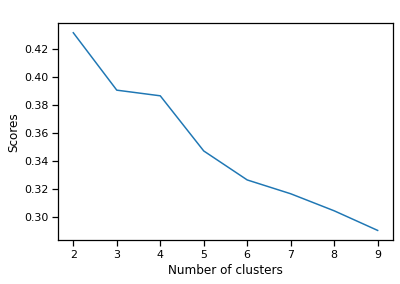

In [0]:
def betacv(data, labels, metric='euclidean'):
    distances = pairwise_distances(data, metric=metric)
    n = labels.shape[0]
    A = np.array([intra_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    B = np.array([inter_cluster_distance(distances[i], labels, i)
                  for i in range(n)])
    a = np.sum(A)
    b = np.sum(B)
    labels_unq = np.unique(labels)
    members = np.array([member_count(labels, i) for i in labels_unq])
    N_in = np.array([i*(i-1) for i in members])
    n_in = np.sum(N_in)
    N_out = np.array([i*(n-i) for i in members])
    n_out = np.sum(N_out)
    betacv = (a/n_in)/(b/n_out)
    #print('intra:', a)
    #print('inter:', b)
    #print('n_in :', n_in)
    #print('n_out:', n_out)
    return betacv

def intra_cluster_distance(distances_row, labels, i):
    mask = labels == labels[i]
    mask[i] = False
    if not np.any(mask):
        # cluster of size 1
        return 0
    a = np.sum(distances_row[mask])
    return a

def inter_cluster_distance(distances_row, labels, i):
    mask = labels != labels[i]
    b = np.sum(distances_row[mask])
    return b

def member_count(labels, i):
    mask = labels == i
    return len(labels[mask])

#Calculando betacv
kmeans_tentativas = {}
scores=[]
for i in range(2, 10):
    kmeans_tentativas['kmeans_' + str(i)] = kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_tentativas['kmeans_' + str(i)].fit(df_standard)
    scores.append( betacv(df_standard.values, kmeans_tentativas['kmeans_' + str(i)].labels_, metric='euclidean'))
    print( 'O Coeficiente de BetaCv do KMeans com {} clusters é: {}'.format(i,
        betacv(df_standard.values, kmeans_tentativas['kmeans_' + str(i)].labels_, metric='euclidean') ) )
    
plt.plot(range(2,10),scores)
plt.title(' ')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.show()

# Medidas externas de qualidade

## Pureza

A pureza do KMeans com 2 clusters é: 1.0
A pureza do KMeans com 3 clusters é: 0.8333333333333334
A pureza do KMeans com 4 clusters é: 0.68
A pureza do KMeans com 5 clusters é: 0.5466666666666666
A pureza do KMeans com 6 clusters é: 0.47333333333333333
A pureza do KMeans com 7 clusters é: 0.4533333333333333
A pureza do KMeans com 8 clusters é: 0.43333333333333335
A pureza do KMeans com 9 clusters é: 0.43333333333333335


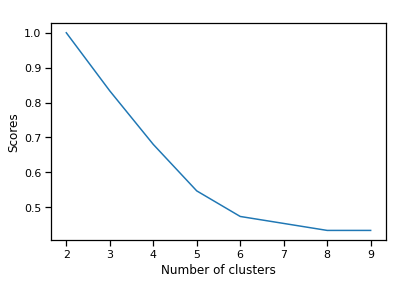

In [0]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_pred, y_true)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

scores=[]
kmeans_tentativas = {}
for i in range(2, 10):
    kmeans_tentativas['kmeans_' + str(i)] = kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_tentativas['kmeans_' + str(i)].fit(df_standard)
    scores.append(purity_score(iris_classe_df.values, kmeans_tentativas['kmeans_' + str(i)].labels_))
    print( 'A pureza do KMeans com {} clusters é: {}'.format(i,
        purity_score(iris_classe_df.values, kmeans_tentativas['kmeans_' + str(i)].labels_)) )
    
plt.plot(range(2,10),scores)
plt.title(' ')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.show()

## Fowlkes-Mallows

A FM do KMeans com 2 clusters é: 0.7714542762891773
A FM do KMeans com 3 clusters é: 0.7452105043132992
A FM do KMeans com 4 clusters é: 0.6256194879511084
A FM do KMeans com 5 clusters é: 0.5840183381380838
A FM do KMeans com 6 clusters é: 0.5298846706590898
A FM do KMeans com 7 clusters é: 0.5913088538340369
A FM do KMeans com 8 clusters é: 0.5242134841455
A FM do KMeans com 9 clusters é: 0.5344293359835395


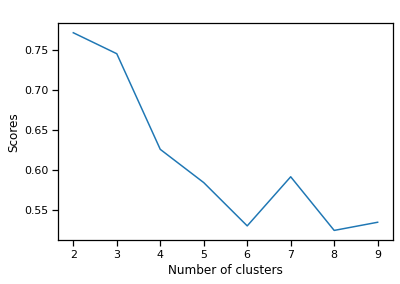

In [0]:

kmeans_tentativas = {}
scores=[]
for i in range(2, 10):
    kmeans_tentativas['kmeans_' + str(i)] = kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_tentativas['kmeans_' + str(i)].fit(df_standard)
    scores.append(fowlkes_mallows_score(np.squeeze(np.asarray(iris_classe_df.values)), kmeans_tentativas['kmeans_' + str(i)].labels_))
    print( 'A FM do KMeans com {} clusters é: {}'.format(i, 
        fowlkes_mallows_score(np.squeeze(np.asarray(iris_classe_df.values)), kmeans_tentativas['kmeans_' + str(i)].labels_)) )

plt.plot(range(2,10),scores)
plt.title(' ')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.show()    

## Estatística Rand

A Estatística Rand do KMeans com 2 clusters é: 0.5681159420289855
A Estatística Rand do KMeans com 3 clusters é: 0.6201351808870379
A Estatística Rand do KMeans com 4 clusters é: 0.46225283750220236
A Estatística Rand do KMeans com 5 clusters é: 0.4204810300834166
A Estatística Rand do KMeans com 6 clusters é: 0.35724761803628613
A Estatística Rand do KMeans com 7 clusters é: 0.4312195029424178
A Estatística Rand do KMeans com 8 clusters é: 0.3523914607819621
A Estatística Rand do KMeans com 9 clusters é: 0.362567615254098


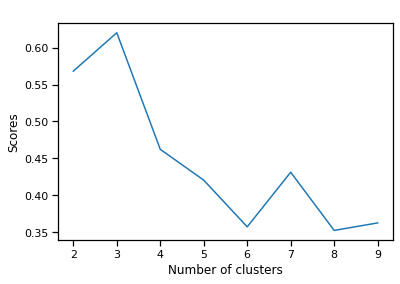

In [0]:
kmeans_tentativas = {}
scores=[]
for i in range(2, 10):
    kmeans_tentativas['kmeans_' + str(i)] = kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_tentativas['kmeans_' + str(i)].fit(df_standard)
    scores.append(adjusted_rand_score(np.squeeze(np.asarray(iris_classe_df.values)), kmeans_tentativas['kmeans_' + str(i)].labels_))
    print( 'A Estatística Rand do KMeans com {} clusters é: {}'.format(i, 
        adjusted_rand_score(np.squeeze(np.asarray(iris_classe_df.values)), kmeans_tentativas['kmeans_' + str(i)].labels_)) )

plt.plot(range(2,10),scores)
plt.title(' ')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.show()    

# K-modes and K-prototypes


In [0]:
! pip install --upgrade kmodes


Requirement already up-to-date: kmodes in /usr/local/lib/python3.6/dist-packages (0.10.2)


In [0]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/mushrooms.csv

mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  365k  100  365k    0     0   172k      0  0:00:02  0:00:02 --:--:--  172k


,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [0]:
mushrooms.dropna(inplace=True)
le = preprocessing.LabelEncoder()
mushrooms = mushrooms.apply(le.fit_transform)
mushrooms.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
from kmodes.kmodes import KModes

y_true = mushrooms['type']
mushrooms.drop(['type'], axis=1, inplace = True)

#kmodes = KModes(n_clusters=2, init='Caos', max_iter=300, n_init=10, random_state=0)

A FM do KModes com 2 clusters é: 0.8109286577776726
A FM do KModes com 3 clusters é: 0.5749492711632173
A FM do KModes com 4 clusters é: 0.5639903786980895
A FM do KModes com 5 clusters é: 0.5489410986781833
A FM do KModes com 6 clusters é: 0.4896843917327532
A FM do KModes com 7 clusters é: 0.4634424095744038
A FM do KModes com 8 clusters é: 0.40070024953806244
A FM do KModes com 9 clusters é: 0.42570704643394747


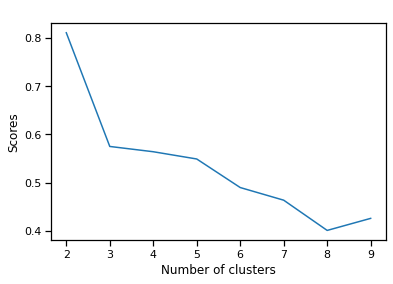

In [0]:
kmodes_tentativas = {}
scores=[]
for i in range(2, 10):
    kmodes_tentativas['kmodes' + str(i)] = KModes(n_clusters=i, init='Huang', n_init=2)
    kmodes_tentativas['kmodes' + str(i)].fit(mushrooms)
    scores.append(fowlkes_mallows_score(np.squeeze(np.asarray(y_true.values)), kmodes_tentativas['kmodes' + str(i)].labels_) )
    print( 'A FM do KModes com {} clusters é: {}'.format(i, 
        fowlkes_mallows_score(np.squeeze(np.asarray(y_true.values)), kmodes_tentativas['kmodes' + str(i)].labels_)) )

plt.plot(range(2,10),scores)
plt.title(' ')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.show()    

## Exemplo Prático: Segmentação de clientes

In [0]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     https://raw.githubusercontent.com/sowmyacr/kmeans_cluster/master/CLV.csv


#Read the csv file
dataset=pd.read_csv('CLV.csv')
#Explore the dataset
dataset.head()#top 5 rows
#descriptive statistics of the dataset
dataset.describe().transpose()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2429  100  2429    0     0   4947      0 --:--:-- --:--:-- --:--:--  4936


,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


Text(0.5, 0, 'Income / spend')

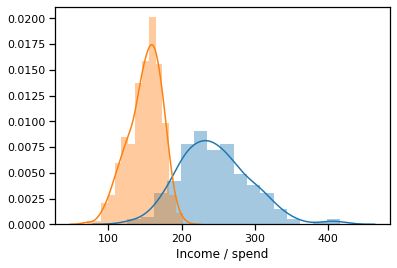

In [0]:
#Visualizing the data - displot
plot_income = sns.distplot(dataset["INCOME"])
plot_spend = sns.distplot(dataset["SPEND"])
plt.xlabel('Income / spend')

In [0]:

#normalização z-score
standard_scaler = preprocessing.StandardScaler()
dataset_standard = standard_scaler.fit_transform(dataset.values)
dataset_standard = pd.DataFrame(dataset_standard,columns=dataset.columns)
#dataset_standard.values

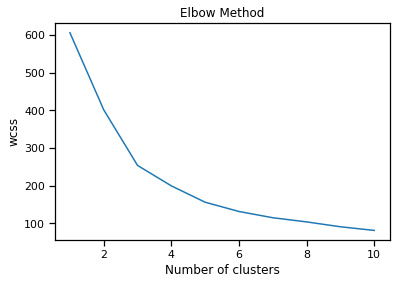

In [0]:
X = dataset_standard.values

#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Text(0, 0.5, 'Annual spend from customer on site')

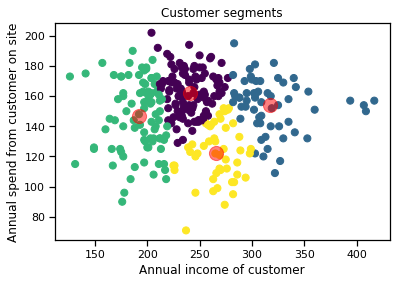

In [0]:
#Sem normalização
X = dataset.values
##Fitting kmeans to the dataset with k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')

Podemos interpretar os segmentos da seguinte forma:
* Cluster 1: Clientes com renda  anual média e baixo gasto anual
* Cluster 2: Clientes com renda  anual alta e média gasto anual
* Cluster 3: Clientes com baixa renda anual
* Cluster 4: Clientes com renda anual media e alto gasto anual

Text(0, 0.5, 'Annual spend from customer on site')

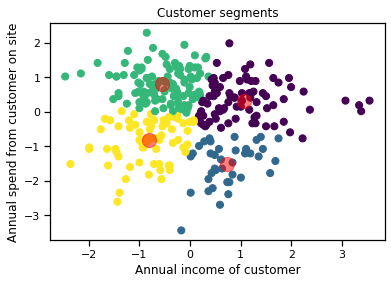

In [0]:
#Com normalização
X = dataset_standard.values
##Fitting kmeans to the dataset with k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')

## Como fica com mais grupos?

Text(0, 0.5, 'Annual spend from customer on site')

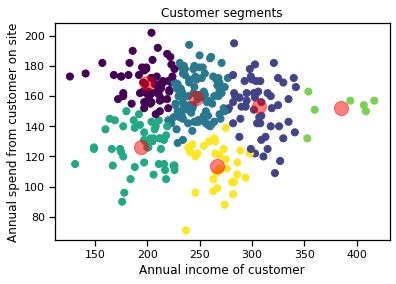

In [0]:
#Sem normalização
X = dataset.values
##Fitting kmeans to the dataset with k=6
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')

Text(0, 0.5, 'Annual spend from customer on site')

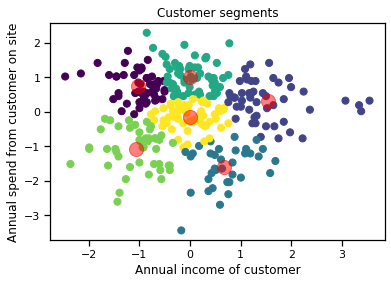

In [0]:
#Com normalização
X = dataset_standard.values
##Fitting kmeans to the dataset with k=6
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')

# Agrupamento hierárquico


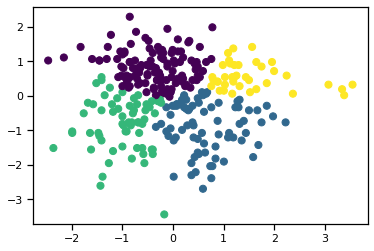

In [0]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage ='ward')

y_hc = hc.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')



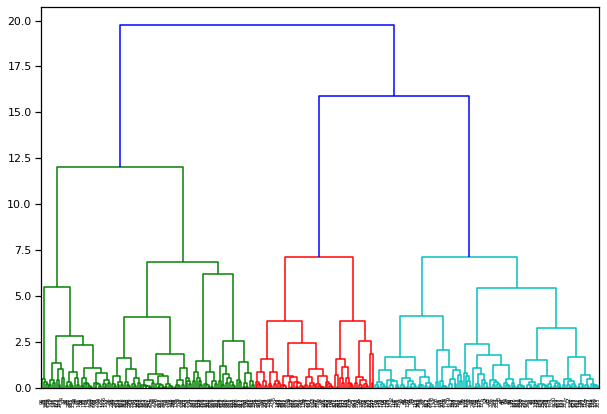

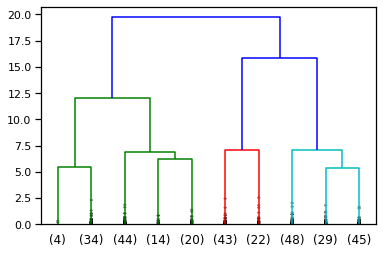

In [0]:
# agrupamento hierárquico com scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'ward')

labelList = range(0, len(X))

plt.figure(figsize=(10, 7))

#dendograma cheio
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

#dendograma simplicifcado
dendrogram(linked,
           p=10,
           truncate_mode='lastp', 
            orientation='top',
            labels=labelList,
            distance_sort='descending',
           show_contracted=True)
plt.show()


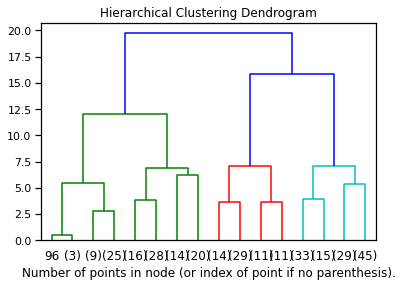

In [0]:
#plotando o dendograma com sciklearn
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

hc = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity = 'euclidean', linkage ='ward')
hc = hc.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(hc, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()    

# DBScan


In [0]:
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756021 sha256=9ed606c29c0c9d78a6f6bad093ccbc4ffbe56ad06c35d0dd6dfb13caaaeda07a
  Stored in directory: /tmp/pip-ephem-wheel-cache-_cdf4ig7/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [0]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
      https://raw.githubusercontent.com/qingkaikong/blog/master/28_DBSCAN/LomaPrieta_aftershocks_1week_above_2.csv

df = pd.read_csv('LomaPrieta_aftershocks_1week_above_2.csv', skiprows = 7)

df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79348  100 79348    0     0   156k      0 --:--:-- --:--:-- --:--:--  156k


,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,1989/10/18 00:04:15.19,37.0362,-121.8798,17.21,7.0,ML,80.0,89.0,1.0,0.08,NC,216859.0
1,1989/10/18 00:07:15.29,37.2382,-121.9445,9.37,4.7,ML,8.0,81.0,16.0,0.16,NC,10090521.0
2,1989/10/18 00:07:43.30,36.9880,-121.7413,15.26,4.7,ML,12.0,121.0,8.0,0.06,NC,10090522.0
3,1989/10/18 00:08:21.99,37.0702,-121.8940,10.43,4.4,ML,11.0,133.0,7.0,0.16,NC,10090523.0
4,1989/10/18 00:08:45.47,37.0760,-121.9250,2.96,4.3,ML,6.0,248.0,14.0,0.03,NC,10090509.0


[37.0362 37.2382 36.988  ... 60.6    43.012  37.183 ]
[-121.8798 -121.9445 -121.7413 ... -151.9557   13.049  -121.9528]


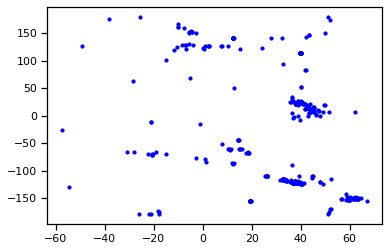

In [0]:

# Get the latitude and logitude of the earthquakes
df = df[['Latitude','Longitude']]
x = df['Latitude'].values
y = df['Longitude'].values

print(x)
print(y)
plt.scatter(x,y,10,marker='o',color='b')
plt.show()

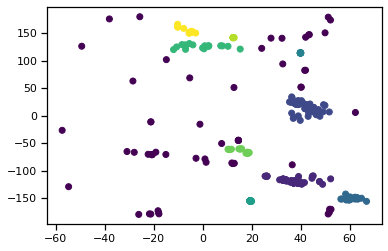

Estimated number of clusters: 9
Estimated number of noise points: 58


In [0]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10, min_samples=10).fit(df)

y_dbscan = dbscan.fit_predict(df.values)
plt.scatter(x, y, c=y_dbscan, cmap='viridis')
plt.show()

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise_ = list(y_dbscan).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

###Descobrindo o melhor raio

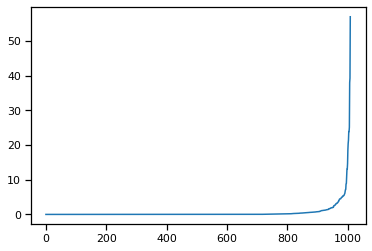

In [0]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df.values)
distances, indices = nbrs.kneighbors(df.values)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

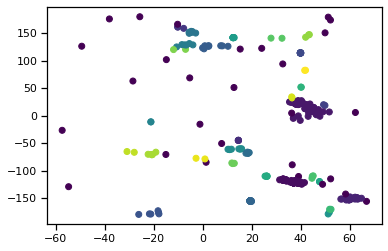

Estimated number of clusters: 31
Estimated number of noise points: 28


In [0]:
dbscan = DBSCAN(eps=5, min_samples=2).fit(df)

y_dbscan = dbscan.fit_predict(df.values)
plt.scatter(x, y,c=y_dbscan, cmap='viridis')
plt.show()

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise_ = list(y_dbscan).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)